In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [14]:
df = pd.read_csv('C:/Users/mkkma/Downloads/Final_PA2_data.CSV')
df.head()

,id,keyword,location,target,lemmatize_without_stopwords
0,1,NaN,NaN,1.0,deed reason earthquake may allah forgive us
1,4,NaN,NaN,1.0,forest fire near la ronge sask canada
2,5,NaN,NaN,1.0,resident ask shelter place notify officer evac...
3,6,NaN,NaN,1.0,people receive wildfire evacuation order calif...
4,7,NaN,NaN,1.0,get sent photo ruby alaska smoke wildfires pou...


In [15]:
len(df.location.unique())

4522

In [16]:
df.drop(['location','keyword'],axis = 1, inplace = True)

### Splitting the test and train

In [17]:
train = df[0:7612]
test = df[7613:10876]

In [18]:
train.head()

,id,target,lemmatize_without_stopwords
0,1,1.0,deed reason earthquake may allah forgive us
1,4,1.0,forest fire near la ronge sask canada
2,5,1.0,resident ask shelter place notify officer evac...
3,6,1.0,people receive wildfire evacuation order calif...
4,7,1.0,get sent photo ruby alaska smoke wildfires pou...


In [20]:
train = shuffle(train)

In [23]:
train.target.sum()

3270.0

### No class imbalance problem

In [24]:
# max len 
max(train['lemmatize_without_stopwords'].str.split().str.len())

23

In [25]:
# Creating a validation set
X = train['lemmatize_without_stopwords']
Y = train['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [288]:
max_words = 15000
max_len =23
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [304]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [320]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [347]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.0001),metrics=['accuracy'])

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_47 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_49 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_89 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [322]:
# Function to show the loss plot of training and validation set
def loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Train on 6470 samples, validate on 1142 samples
Epoch 1/20
6470/6470 [==============================] - 4s 627us/step - loss: 0.6874 - accuracy: 0.5716 - val_loss: 0.6813 - val_accuracy: 0.5648
Epoch 2/20
6470/6470 [==============================] - 4s 556us/step - loss: 0.6763 - accuracy: 0.5714 - val_loss: 0.6731 - val_accuracy: 0.5648
Epoch 3/20
6470/6470 [==============================] - 4s 555us/step - loss: 0.6681 - accuracy: 0.5714 - val_loss: 0.6654 - val_accuracy: 0.5648
Epoch 4/20
6470/6470 [==============================] - 3s 532us/step - loss: 0.6558 - accuracy: 0.5750 - val_loss: 0.6503 - val_accuracy: 0.5797
Epoch 5/20
6470/6470 [==============================] - 3s 436us/step - loss: 0.6360 - accuracy: 0.6161 - val_loss: 0.6324 - val_accuracy: 0.6261
Epoch 6/20
6470/6470 [==============================] - 3s 439us/step - loss: 0.6084 - accuracy: 0.6912 - val_loss: 0.6050 - val_accuracy: 0.6821
Epoch 7/20
6470/6470 [==============================] - 4s 556us/step - loss

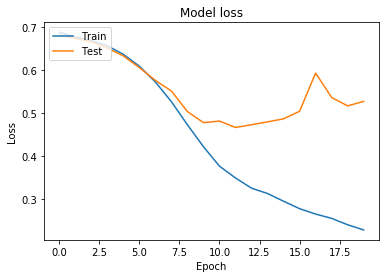

In [323]:
lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

### From this loss plot it appears epoch = 15 is the best 

Train on 6470 samples, validate on 1142 samples
Epoch 1/15
6470/6470 [==============================] - 5s 780us/step - loss: 0.6881 - accuracy: 0.5629 - val_loss: 0.6820 - val_accuracy: 0.5648
Epoch 2/15
6470/6470 [==============================] - 4s 606us/step - loss: 0.6773 - accuracy: 0.5714 - val_loss: 0.6743 - val_accuracy: 0.5648
Epoch 3/15
6470/6470 [==============================] - 3s 488us/step - loss: 0.6698 - accuracy: 0.5714 - val_loss: 0.6660 - val_accuracy: 0.5648
Epoch 4/15
6470/6470 [==============================] - 3s 482us/step - loss: 0.6583 - accuracy: 0.5730 - val_loss: 0.6532 - val_accuracy: 0.5806
Epoch 5/15
6470/6470 [==============================] - 4s 597us/step - loss: 0.6417 - accuracy: 0.6083 - val_loss: 0.6352 - val_accuracy: 0.6252
Epoch 6/15
6470/6470 [==============================] - 4s 610us/step - loss: 0.6160 - accuracy: 0.6790 - val_loss: 0.6105 - val_accuracy: 0.6769
Epoch 7/15
6470/6470 [==============================] - 4s 557us/step - loss

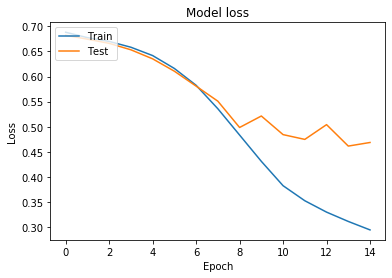

In [348]:
lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

In [349]:
accr = model.evaluate(test_sequences_matrix,Y_test)

1142/1142 [==============================] - 0s 279us/step


In [350]:
accr

[0.468724530862217, 0.8003502488136292]

In [351]:
Y_pred = model.predict(test_sequences_matrix)
Y_pred = [1 if i>0.5 else 0 for i in Y_pred]

In [352]:
f1_score(Y_test, Y_pred, average='micro')

0.8003502626970228

### A learning rate decay might improve the performance